In [1]:
import libsbml
from utils import functions
from utils import graph_functions
from utils import complete_tests
import random
import pickle
import numpy as np
import os 
from copy import deepcopy
from collections import defaultdict

In [2]:
description = {
    'species': [],
    'reactions': [],
    'connections': [],
    'altered': ''
}

In [3]:
def convert_sbml_to_network(file_path):
    
    reader = libsbml.SBMLReader()
    document = reader.readSBML(file_path)
    if document.getNumErrors() > 0:
        print("Errors occurred while loading the SBML file.")
    model = document.getModel()
    
    num_reactions = model.getNumReactions()
    num_species = model.getNumSpecies()
    
    print('number reactions', model.getNumReactions())
    print('number species', model.getNumSpecies()) 
    
    for i in range(num_species):
        description['species'].append(model.getSpecies(i).getId())
    
    for i in range(num_reactions):
        description['reactions'].append([model.getReaction(i).getId(), 0, 1])
        num_reactants = model.getReaction(i).getNumReactants()
        num_products = model.getReaction(i).getNumProducts()
        formula = model.getReaction(i).getKineticLaw().getFormula()
        formula = formula.replace('(','')
        formula = formula.replace(' ', '')
        formula_splitted = formula.split('-')
        
        if len(formula_splitted) >= 2:
            description['reactions'].append([str(model.getReaction(i).getId() + 'revert'), 0, 1])
        
        for j in range(num_reactants):
            reactant = model.getReaction(i).getReactant(j).getSpecies()
            description['connections'].append([reactant, model.getReaction(i).getId()])
            if len(formula_splitted) == 2:
                description['connections'].append([str(model.getReaction(i).getId() + 'revert'), reactant])
            
        for k in range(num_products):
            product = model.getReaction(i).getProduct(k).getSpecies()
            description['connections'].append([model.getReaction(i).getId(), product])
            if len(formula_splitted) == 2:
                description['connections'].append([product, str(model.getReaction(i).getId() + 'revert')])

In [4]:
convert_sbml_to_network('BIOMD0000000102.xml')

number reactions 28
number species 13


In [5]:
len(description['reactions'])

41

In [6]:
description

{'species': ['A',
  'C9',
  'C9X',
  'X',
  'AC9X',
  'AC9',
  'C3',
  'C3_star',
  'C3_starX',
  'C9_starX',
  'C9_star',
  'AC9_star',
  'AC9_starX'],
 'reactions': [['v1', 0, 1],
  ['v1revert', 0, 1],
  ['v2', 0, 1],
  ['v3', 0, 1],
  ['v9', 0, 1],
  ['v9revert', 0, 1],
  ['v10', 0, 1],
  ['v10revert', 0, 1],
  ['v13', 0, 1],
  ['v13revert', 0, 1],
  ['v15', 0, 1],
  ['v15revert', 0, 1],
  ['v4', 0, 1],
  ['v5', 0, 1],
  ['v8', 0, 1],
  ['v8revert', 0, 1],
  ['v11', 0, 1],
  ['v11revert', 0, 1],
  ['v12', 0, 1],
  ['v12revert', 0, 1],
  ['v14', 0, 1],
  ['v14revert', 0, 1],
  ['v6', 0, 1],
  ['v7', 0, 1],
  ['v16', 0, 1],
  ['v16revert', 0, 1],
  ['v17', 0, 1],
  ['v17revert', 0, 1],
  ['v18', 0, 1],
  ['v18revert', 0, 1],
  ['v19', 0, 1],
  ['v20', 0, 1],
  ['v21', 0, 1],
  ['v22', 0, 1],
  ['v22revert', 0, 1],
  ['v23', 0, 1],
  ['v24', 0, 1],
  ['v25', 0, 1],
  ['v26', 0, 1],
  ['v27', 0, 1],
  ['v28', 0, 1]],
 'connections': [['A', 'v1'],
  ['v1revert', 'A'],
  ['C9', 'v1'],
  [

In [5]:
def alter_pathway(input_filename, output_filename, alterations):
    reader = libsbml.SBMLReader()
    document = reader.readSBML(input_filename)
    model = document.getModel()

    for i in range(model.getNumParameters()):
        param = model.getParameter(i)
        if param.getId() == alterations:
            previous_value = param.getValue()
            param.setValue(previous_value * 100)
            modified_sbml = libsbml.writeSBML(document, output_filename)
            return 

In [6]:
def generate_test_set(filename):
    reader = libsbml.SBMLReader()
    document = reader.readSBML(filename)
    model = document.getModel()
    
    for i in range(model.getNumParameters()):
        base_dir = 'altered_pathways2'
        alteration_dir = os.path.join(base_dir, 'reaction_' + str(i))
        file_dir = os.path.join(alteration_dir, 'reaction_' + str(i) + '100x.xml')
        os.makedirs(alteration_dir, exist_ok=True)
        
        param = model.getParameter(i)

        alter_pathway(filename, file_dir, param.getId())

In [7]:
generate_test_set('BIOMD0000000102.xml')

In [8]:
for i in range(len(description['reactions'])):
    desc = deepcopy(description)
    desc['altered'] = desc['reactions'][i][0]
    base_dir = 'altered_pathways2'
    alteration_dir = os.path.join(base_dir, 'reaction_' + str(i))
    description_path = os.path.join(alteration_dir, 'description')
    description_file = open(description_path, 'wb')
    pickle.dump(desc, description_file)
    description_file.close()
    

In [9]:
description_path = 'altered_pathways2/reaction_15/description'
description_file = open(description_path, 'rb')
temp = pickle.load(description_file)
description_file.close()
temp

{'species': ['A',
  'C9',
  'C9X',
  'X',
  'AC9X',
  'AC9',
  'C3',
  'C3_star',
  'C3_starX',
  'C9_starX',
  'C9_star',
  'AC9_star',
  'AC9_starX'],
 'reactions': [['v1', 0, 1],
  ['v1revert', 0, 1],
  ['v2', 0, 1],
  ['v3', 0, 1],
  ['v9', 0, 1],
  ['v9revert', 0, 1],
  ['v10', 0, 1],
  ['v10revert', 0, 1],
  ['v13', 0, 1],
  ['v13revert', 0, 1],
  ['v15', 0, 1],
  ['v15revert', 0, 1],
  ['v4', 0, 1],
  ['v5', 0, 1],
  ['v8', 0, 1],
  ['v8revert', 0, 1],
  ['v11', 0, 1],
  ['v11revert', 0, 1],
  ['v12', 0, 1],
  ['v12revert', 0, 1],
  ['v14', 0, 1],
  ['v14revert', 0, 1],
  ['v6', 0, 1],
  ['v7', 0, 1],
  ['v16', 0, 1],
  ['v16revert', 0, 1],
  ['v17', 0, 1],
  ['v17revert', 0, 1],
  ['v18', 0, 1],
  ['v18revert', 0, 1],
  ['v19', 0, 1],
  ['v20', 0, 1],
  ['v21', 0, 1],
  ['v22', 0, 1],
  ['v22revert', 0, 1],
  ['v23', 0, 1],
  ['v24', 0, 1],
  ['v25', 0, 1],
  ['v26', 0, 1],
  ['v27', 0, 1],
  ['v28', 0, 1]],
 'connections': [['A', 'v1'],
  ['v1revert', 'A'],
  ['C9', 'v1'],
  [

In [2]:
total_species = 0
uncertain_species = 0
correct_species = 0
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0 
deltas_normal = []
deltas_uncertain = []

complete_results = defaultdict()
for directory in list(os.listdir('altered_pathways2')):
    if directory == '.DS_Store':
        continue
    dir = os.path.join('altered_pathways2', directory)
    files = os.listdir(dir)
    description_index = 0
    altered_file_index = 0
    
    for i in range(len(files)):
        if files[i] == 'description':
            description_index = i
        elif files[i] != 'description' and files[i] != 'results':
            altered_file_index = i
            
    res = complete_tests.complete_tests2(
            'BIOMD0000000102.xml',
            os.path.join(dir, files[altered_file_index]),
            os.path.join(dir, 'description'),
            []
        )
    
    complete_results_path = os.path.join(dir, 'results')
    complete_results_file = open(complete_results_path, 'wb')
    pickle.dump(res, complete_results_file)
    complete_results_file.close()
        
    insights, all, uncertain, d_normal, d_uncertain = complete_tests.get_insights_confidence_intervals('altered', res, 1, detailed_classification=False, threshold=0, ignore_uncertain=False)
    
    total_species += all
    uncertain_species += uncertain
    
    for d in d_normal:
        deltas_normal.append(d)
    for d in d_uncertain:
        deltas_uncertain.append(d)
        
    total_count = 0
    correct_count = 0
    for specie in insights.keys():
        
        if insights[specie][0] == 0 or insights[specie][1][1] == 0.5:
            continue
        
        total_count += 1
        if insights[specie][0] == insights[specie][1][0]:
            correct_count += 1
            correct_species += 1
        
        if insights[specie][1][0] == insights[specie][0] == 1:
            true_positives += 1
        elif insights[specie][1][0] == insights[specie][0] == -1:
            true_negatives += 1
        elif insights[specie][1][0] == 1 and insights[specie][0] == -1:
            false_positives += 1
        elif insights[specie][1][0] == -1 and insights[specie][0] == 1:
            false_negatives += 1
        
        
         
    print(directory, ' total species: ', total_count, 'correct species: ', correct_count, 'ratio: ', correct_count/total_count)
    complete_results[directory] = correct_count / total_count
    

Min and max abs differences:  1.7763568394002505e-15 1.3435861451194242e-10
Min and max abs differences:  3.4736935550228054e-12 9.109649863603408e-05
Specie:  A expected result:  increased  normal final:  15.340177383204422  altered final:  1980.4059746435555
confidence interval:  [0.9387618649701794, 0.9412307020095431]
deltas coming from simulation:  [1965.065797260351, 0]
Specie:  C9 expected result:  decreased  normal final:  0.5230087146622235  altered final:  0.019794779011272
confidence interval:  [0.3980780404060729, 0.40520629749842174]
deltas coming from simulation:  [-0.5032139356509515, 0]
Specie:  C9X expected result:  decreased  normal final:  0.04217854473987508  altered final:  0.001212629826073112
confidence interval:  [0.3738744366806133, 0.3806261618892177]
deltas coming from simulation:  [-0.04096591491380197, 0]
Specie:  X expected result:  decreased  normal final:  0.17061923697255188  altered final:  0.16134140405235195
confidence interval:  [0.499101154617349, 

In [3]:
scores = []
for experiment in complete_results.keys():
    scores.append(complete_results[experiment])
print('Average score: ', np.average(np.array(scores)))

Average score:  0.7973733583489682


In [4]:
results_path = '../../../results/real_dataset/large_class/results'
results_file = open(results_path, 'rb')
partial_results = pickle.load(results_file)
results_file.close()
partial_results

{'total_species': 3696,
 'uncertain_species': 208,
 'correct_species': 2710,
 'true_positives': 1313,
 'false_positives': 529,
 'false_negatives': 457,
 'true_negatives': 1397}

In [4]:
print('total: ', total_species, ' correct: ', correct_species, ' uncertain: ', uncertain_species, ' true pos: ', true_positives, ' true neg: ', true_negatives, ' false_pos: ', false_positives, 'false neg: ', false_negatives,)

total:  533  correct:  425  uncertain:  55  true pos:  187  true neg:  238  false_pos:  57 false neg:  51


In [6]:
partial_results['total_species'] += total_species
partial_results['uncertain_species'] += uncertain_species
partial_results['correct_species'] += correct_species
partial_results['true_positives'] += true_positives
partial_results['false_positives'] += false_positives
partial_results['true_negatives'] += true_negatives
partial_results['false_negatives'] += false_negatives

In [7]:
results_path = '../../../results/real_dataset/large_class/results'
results_file = open(results_path, 'wb')
pickle.dump(partial_results, results_file)
results_file.close()

In [4]:
scores

[0.8461538461538461,
 0.6153846153846154,
 0.5384615384615384,
 0.5384615384615384,
 0.6923076923076923,
 0.6153846153846154,
 0.9230769230769231,
 0.46153846153846156,
 0.5384615384615384,
 0.46153846153846156,
 0.7692307692307693,
 0.5384615384615384,
 0.7692307692307693,
 0.46153846153846156,
 0.38461538461538464,
 0.9230769230769231,
 0.9230769230769231,
 0.7692307692307693,
 0.6153846153846154,
 0.8461538461538461,
 0.7692307692307693,
 0.46153846153846156,
 0.38461538461538464,
 0.3076923076923077,
 0.7692307692307693,
 0.5384615384615384,
 0.6153846153846154,
 0.38461538461538464,
 0.3076923076923077,
 0.46153846153846156,
 0.38461538461538464,
 0.3076923076923077,
 0.6153846153846154,
 0.6923076923076923,
 0.9230769230769231,
 0.8461538461538461,
 0.7692307692307693,
 0.6923076923076923,
 0.5384615384615384,
 0.5384615384615384,
 0.8461538461538461]

In [8]:
len(description['reactions'])

47

In [9]:
description

{'species': ['EGF',
  'R',
  'Ra',
  'R2',
  'RP',
  'PLCg',
  'RPLCg',
  'RPLCgP',
  'PLCgP',
  'Grb',
  'RG',
  'SOS',
  'RGS',
  'GS',
  'Shc',
  'RSh',
  'RShP',
  'ShP',
  'RShG',
  'ShG',
  'RShGS',
  'ShGS',
  'PLCgl'],
 'reactions': [['v1', 0, 1],
  ['v1revert', 0, 1],
  ['v2', 0, 1],
  ['v2revert', 0, 1],
  ['v3', 0, 1],
  ['v3revert', 0, 1],
  ['v4', 0, 1],
  ['v5', 0, 1],
  ['v5revert', 0, 1],
  ['v6', 0, 1],
  ['v6revert', 0, 1],
  ['v7', 0, 1],
  ['v7revert', 0, 1],
  ['v8', 0, 1],
  ['v9', 0, 1],
  ['v9revert', 0, 1],
  ['v10', 0, 1],
  ['v10revert', 0, 1],
  ['v11', 0, 1],
  ['v11revert', 0, 1],
  ['v12', 0, 1],
  ['v12revert', 0, 1],
  ['v13', 0, 1],
  ['v13revert', 0, 1],
  ['v14', 0, 1],
  ['v14revert', 0, 1],
  ['v15', 0, 1],
  ['v15revert', 0, 1],
  ['v16', 0, 1],
  ['v17', 0, 1],
  ['v17revert', 0, 1],
  ['v18', 0, 1],
  ['v18revert', 0, 1],
  ['v19', 0, 1],
  ['v19revert', 0, 1],
  ['v20', 0, 1],
  ['v20revert', 0, 1],
  ['v21', 0, 1],
  ['v21revert', 0, 1],
  ['v

In [10]:
description['altered'] = 'v1'
description

{'species': ['EGF',
  'R',
  'Ra',
  'R2',
  'RP',
  'PLCg',
  'RPLCg',
  'RPLCgP',
  'PLCgP',
  'Grb',
  'RG',
  'SOS',
  'RGS',
  'GS',
  'Shc',
  'RSh',
  'RShP',
  'ShP',
  'RShG',
  'ShG',
  'RShGS',
  'ShGS',
  'PLCgl'],
 'reactions': [['v1', 0, 1],
  ['v1revert', 0, 1],
  ['v2', 0, 1],
  ['v2revert', 0, 1],
  ['v3', 0, 1],
  ['v3revert', 0, 1],
  ['v4', 0, 1],
  ['v5', 0, 1],
  ['v5revert', 0, 1],
  ['v6', 0, 1],
  ['v6revert', 0, 1],
  ['v7', 0, 1],
  ['v7revert', 0, 1],
  ['v8', 0, 1],
  ['v9', 0, 1],
  ['v9revert', 0, 1],
  ['v10', 0, 1],
  ['v10revert', 0, 1],
  ['v11', 0, 1],
  ['v11revert', 0, 1],
  ['v12', 0, 1],
  ['v12revert', 0, 1],
  ['v13', 0, 1],
  ['v13revert', 0, 1],
  ['v14', 0, 1],
  ['v14revert', 0, 1],
  ['v15', 0, 1],
  ['v15revert', 0, 1],
  ['v16', 0, 1],
  ['v17', 0, 1],
  ['v17revert', 0, 1],
  ['v18', 0, 1],
  ['v18revert', 0, 1],
  ['v19', 0, 1],
  ['v19revert', 0, 1],
  ['v20', 0, 1],
  ['v20revert', 0, 1],
  ['v21', 0, 1],
  ['v21revert', 0, 1],
  ['v

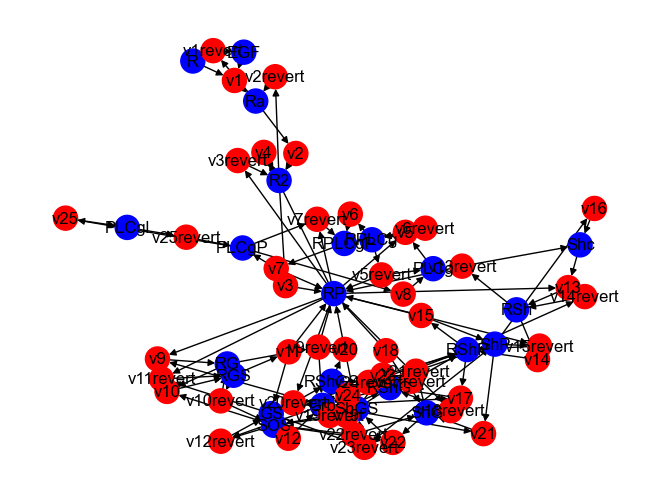

In [11]:
graph = functions.generate_graph(description)
functions.plot_graph(graph)

In [12]:
description_path = 'description_reaction1_altered'
description_file = open(description_path, 'wb')
pickle.dump(description, description_file)
description_file.close()

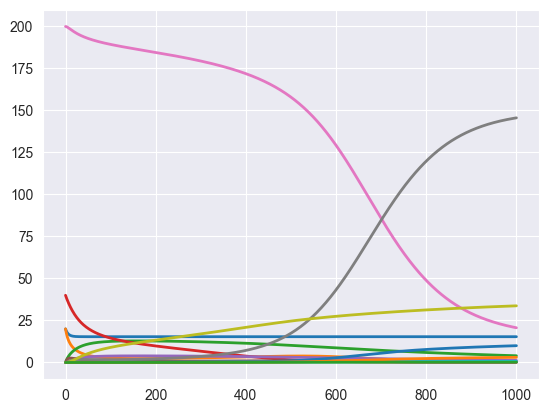

       time,     [A],     [C9],   [C9X],      [X],    [AC9X],    [AC9],    [C3], [C3_star], [C3_starX],  [C9_starX],   [C9_star],  [AC9_star], [AC9_starX]
 [[       0,      20,       20,       0,       40,         0,        0,     200,         0,          0,           0,           0,           0,           0],
  [   1.001, 19.2672,  18.5189, 0.74818,  39.2212, 0.0284658, 0.704335, 199.955, 0.0428764, 0.00211722, 7.87953e-07, 6.62763e-05, 2.52132e-06, 2.99786e-08],
  [   2.002, 18.6541,  17.2477, 1.40606,  38.4811,  0.101519,  1.24437, 199.868,  0.120529,  0.0113548, 7.69621e-06, 0.000335723, 2.42337e-05, 5.55665e-07],
  [   3.003, 18.1398,  16.1471, 1.99186,   37.773,  0.204471,   1.6556, 199.749,  0.219959,  0.0306303, 2.91368e-05, 0.000859495, 8.81956e-05, 2.99087e-06],
  [   4.004, 17.7076,  15.1865, 2.51942,  37.0924,  0.326615,  1.96553, 199.607,  0.331765,  0.0614486, 7.39092e-05,  0.00164331, 0.000212923, 9.58099e-06],
  [ 5.00501, 17.3437,  14.3416, 2.99934,   36.436,  0.460173

In [2]:
final_concentrations_normal = functions.plot_simulation_complete('BIOMD0000000102.xml')

In [3]:
final_concentrations_altered = functions.plot_simulation_complete('BIOMD0000000048_reaction1_100x.xml')

Error: Could not open stream: File not found


RuntimeError: static std::string rr::SBMLReader::read(const std::string &), could not open BIOMD0000000048_reaction1_100x.xml as a file or uri

In [15]:
species = description['species']
species

['EGF',
 'R',
 'Ra',
 'R2',
 'RP',
 'PLCg',
 'RPLCg',
 'RPLCgP',
 'PLCgP',
 'Grb',
 'RG',
 'SOS',
 'RGS',
 'GS',
 'Shc',
 'RSh',
 'RShP',
 'ShP',
 'RShG',
 'ShG',
 'RShGS',
 'ShGS',
 'PLCgl']

In [16]:
final_normal = final_concentrations_normal[0][-1]
final_altered = final_concentrations_altered[0][-1]

In [17]:
final_normal

[1.00000000e+03 5.80599796e+02 5.99795918e-01 1.74120694e+01
 3.03180163e+01 3.60741476e+00 1.78387154e-01 4.54229304e-02
 3.17930599e-01 3.04247356e+00 1.41682417e+01 3.06958504e+00
 1.77995938e+00 9.13071753e-01 1.69644603e+00 1.15078848e+00
 7.33096786e-02 1.83700763e+00 8.17862387e+01 4.76574477e-01
 3.50655582e+01 3.35734138e-01 2.92747887e+01 1.01415786e+02]

In [18]:
temp = final_concentrations_normal[1]
temp

[680. 100.   0.   0.   0. 105.   0.   0.   0.  85.   0.  34.   0.   0.
 150.   0.   0.   0.   0.   0.   0.   0.   0.]

In [19]:
import math
expected_results = {}
for i in range(len(species)):
    delta1 = 0
    delta2 = 0
    print(species[i])
    if final_normal[i + 1] != 0:
        if temp[i] != 0:
            initial_concentration = temp[i]
            delta1 = math.fabs((final_altered[i + 1] - final_normal[i + 1]) / initial_concentration)
            delta2 = math.fabs(1 - (final_altered[i + 1] / final_normal[i + 1]))
            paired_delta = delta1 * delta2
        else:
            delta2 = math.fabs(1 - (final_altered[i + 1] / final_normal[i + 1]))
            paired_delta = delta2 / 100
            
        relative_delta = (final_altered[i + 1] - final_normal[i + 1]) / final_normal[i + 1]
        
    else: 
        relative_delta = 0
        
    if paired_delta >= 0.001 and final_altered[i + 1] < final_normal[i + 1]:
        expected_results[species[i]] = 'decreased'
    elif paired_delta >= 0.001 and final_altered[i + 1] > final_normal[i + 1]:
        expected_results[species[i]] = 'increased'
    else:
        expected_results[species[i]] = 'unchanged'
    
    print('final normal: ', final_normal[i + 1], 'final altered: ', final_altered[i + 1], 'delta: ', final_altered[i + 1] - final_normal[i + 1], 'relative delta ', relative_delta, 'initial concentration: ', temp[i], 'delta1', delta1, 'delta2', delta2)

EGF
final normal:  580.599795917785 final altered:  580.000602440313 delta:  -0.5991934774719994 relative delta  -0.0010320249536512882 initial concentration:  680.0 delta1 0.0008811668786352932 delta2 0.0010320249536512893
R
final normal:  0.5997959177827454 final altered:  0.0006024403131018151 delta:  -0.5991934774696436 relative delta  -0.9989955911748635 initial concentration:  100.0 delta1 0.0059919347746964354 delta2 0.9989955911748636
Ra
final normal:  17.412069399564867 final altered:  17.47078722666854 delta:  0.058717827103674125 relative delta  0.003372248625722885 initial concentration:  0.0 delta1 0 delta2 0.003372248625722829
R2
final normal:  30.318016326850078 final altered:  30.52284062643741 delta:  0.20482429958733306 relative delta  0.006755860851157919 initial concentration:  0.0 delta1 0 delta2 0.00675586085115798
RP
final normal:  3.6074147637684906 final altered:  3.633554753728144 delta:  0.026139989959653498 relative delta  0.0072461836720838614 initial conce

In [20]:
expected_results

{'EGF': 'unchanged',
 'R': 'decreased',
 'Ra': 'unchanged',
 'R2': 'unchanged',
 'RP': 'unchanged',
 'PLCg': 'unchanged',
 'RPLCg': 'unchanged',
 'RPLCgP': 'unchanged',
 'PLCgP': 'unchanged',
 'Grb': 'unchanged',
 'RG': 'unchanged',
 'SOS': 'unchanged',
 'RGS': 'unchanged',
 'GS': 'unchanged',
 'Shc': 'unchanged',
 'RSh': 'unchanged',
 'RShP': 'unchanged',
 'ShP': 'unchanged',
 'RShG': 'unchanged',
 'ShG': 'unchanged',
 'RShGS': 'unchanged',
 'ShGS': 'unchanged',
 'PLCgl': 'unchanged'}

In [5]:
description['reactions'][0][1] = 0.2

In [9]:
for i in range(len(description['reactions'])):
    description['reactions'][i][2] = random.uniform(0, 1)
    description['reactions'][i].append([])

In [10]:
graph = graph_functions.generate_graph(description)

In [11]:
species_propagation = []
for i in range(100):
    print("ITERATION ", i)
    species_propagation.append(graph_functions.update_graph(graph, 0, i + 1))

ITERATION  0
ITERATION  1
ITERATION  2
ITERATION  3
ITERATION  4
ITERATION  5
ITERATION  6
ITERATION  7
ITERATION  8
ITERATION  9
ITERATION  10
ITERATION  11
ITERATION  12
ITERATION  13
ITERATION  14
ITERATION  15
ITERATION  16
ITERATION  17
ITERATION  18
ITERATION  19
ITERATION  20
ITERATION  21
ITERATION  22
ITERATION  23
ITERATION  24
ITERATION  25
ITERATION  26
ITERATION  27
ITERATION  28
ITERATION  29
ITERATION  30
ITERATION  31
ITERATION  32
ITERATION  33
ITERATION  34
ITERATION  35
ITERATION  36
ITERATION  37
ITERATION  38
ITERATION  39
ITERATION  40
ITERATION  41
ITERATION  42
ITERATION  43
ITERATION  44
ITERATION  45
ITERATION  46
ITERATION  47
ITERATION  48
ITERATION  49
ITERATION  50
ITERATION  51
ITERATION  52
ITERATION  53
ITERATION  54
ITERATION  55
ITERATION  56
ITERATION  57
ITERATION  58
ITERATION  59
ITERATION  60
ITERATION  61
ITERATION  62
ITERATION  63
ITERATION  64
ITERATION  65
ITERATION  66
ITERATION  67
ITERATION  68
ITERATION  69
ITERATION  70
ITERATION  71
IT

In [21]:
species_propagation

[{'M': 0.31002551887238755,
  'MpY': 0.5,
  'MpT': 0.5,
  'Mpp': 0.5,
  'MAPKK': 0.31002551887238755,
  'MKP': 0.5,
  'MpY_MAPKK': 0.5,
  'MpT_MAPKK': 0.5,
  'M_MAPKK_Y': 0.6899744811276125,
  'M_MAPKK_T': 0.5,
  'Mpp_MKP_Y': 0.5,
  'Mpp_MKP_T': 0.5,
  'MpY_MKP_Y': 0.5,
  'MpY_MKP_T': 0.5,
  'MpT_MKP_Y': 0.5,
  'MpT_MKP_T': 0.5,
  'M_MKP_T': 0.5,
  'M_MKP_Y': 0.5},
 {'M': 0.6708783557279607,
  'MpY': 0.9422795106044548,
  'MpT': 0.8670982768741314,
  'Mpp': 0.5,
  'MAPKK': 0.5913580924001746,
  'MKP': 0.9290585038041786,
  'MpY_MAPKK': 0.08410755778349127,
  'MpT_MAPKK': 0.13290172312586868,
  'M_MAPKK_Y': 0.09475501814094794,
  'M_MAPKK_T': 0.025746483254046715,
  'Mpp_MKP_Y': 0.5,
  'Mpp_MKP_T': 0.5,
  'MpY_MKP_Y': 0.5,
  'MpY_MKP_T': 0.5,
  'MpT_MKP_Y': 0.5,
  'MpT_MKP_T': 0.5,
  'M_MKP_T': 0.06570426290880449,
  'M_MKP_Y': 0.0761787294828381},
 {'M': 0.04762354052406159,
  'MpY': 0.44484555728100167,
  'MpT': 0.33842444463130605,
  'Mpp': 0.027778923927269716,
  'MAPKK': 0.03456896

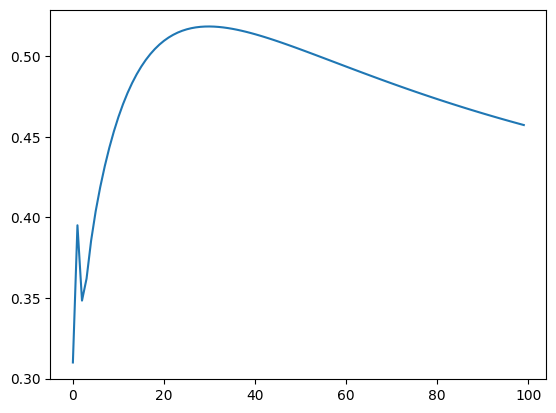

In [74]:
import matplotlib.pyplot as plt
concentrations = [conc['M'] for conc in species_propagation]
concentrations
plt.plot(concentrations[0:500])

In [75]:
final_propagation = species_propagation[-1]
for s in final_propagation.keys():
    print(s, 'propagation results: ', final_propagation[s], 'simulation results: ', expected_results[s])

M propagation results:  0.4573673063139326 simulation results:  increased
MpY propagation results:  0.5859506999350107 simulation results:  increased
MpT propagation results:  0.42683903449371147 simulation results:  increased
Mpp propagation results:  0.38758917256795355 simulation results:  unchanged
MAPKK propagation results:  0.4282587576580072 simulation results:  decreased
MKP propagation results:  0.5468037734808247 simulation results:  increased
MpY_MAPKK propagation results:  0.5034654849769683 simulation results:  unchanged
MpT_MAPKK propagation results:  0.4660739809818277 simulation results:  unchanged
M_MAPKK_Y propagation results:  0.5647061946329963 simulation results:  increased
M_MAPKK_T propagation results:  0.47072859983635107 simulation results:  unchanged
Mpp_MKP_Y propagation results:  0.4835596299636847 simulation results:  unchanged
Mpp_MKP_T propagation results:  0.4836623648528669 simulation results:  unchanged
MpY_MKP_Y propagation results:  0.534006843731000

In [21]:
res = complete_tests.complete_tests2(
            'BIOMD0000000048.xml',
            'BIOMD0000000048_reaction1_100x.xml',
            'description_reaction1_altered',
            []
        )

In [22]:
insights = complete_tests.get_insights_confidence_intervals('altered', res, 1, detailed_classification=True, threshold=0)

Specie:  EGF expected result:  decreased
confidence interval:  [0.409292143273189, 0.41347215843377266]
Specie:  R expected result:  decreased
confidence interval:  [0.409292143273189, 0.41347215843377266]
Specie:  Ra expected result:  increased
confidence interval:  [0.6061208316307295, 0.6085289041801097]
Specie:  R2 expected result:  increased
confidence interval:  [0.6241334894421996, 0.6294320291939678]
Specie:  RP expected result:  increased
confidence interval:  [0.5823742124584365, 0.5877564835745356]
Specie:  PLCg expected result:  decreased
confidence interval:  [0.42587562208706453, 0.43147379598674396]
Specie:  RPLCg expected result:  increased
confidence interval:  [0.5193309270818658, 0.520732909861455]
Specie:  RPLCgP expected result:  increased
confidence interval:  [0.5291838224715127, 0.5312418335440335]
Specie:  PLCgP expected result:  decreased
confidence interval:  [0.48933799315980436, 0.4904258978092794]
Specie:  Grb expected result:  decreased
confidence interva

In [23]:
total_count = 0
correct_count = 0
for specie in insights.keys():
    total_count += 1
    if insights[specie][0] == insights[specie][1]:
        correct_count += 1
print('total experiments: ', total_count, 'correct experiments: ', correct_count, 'ratio: ', correct_count/total_count)

total experiments:  23 correct experiments:  21 ratio:  0.9130434782608695


In [31]:
total_count = 0
correct_count = 0
for specie in insights[2].keys():
    if expected_results[specie] != 'unchanged':
        total_count += 1
    if type(specie) != type(''):
        continue
    print('specie: ', specie)
    scores = np.array(insights[2][specie][-1])
    mean = np.mean(scores)
    std = np.std(scores)
    std_error = std / np.sqrt(len(scores))
    margin = 2 * std_error
    lower = mean - margin
    higher = mean + margin
    print(' lower: ', lower, ' higher: ', higher)
    if lower > 0.5: 
        print('increase, expected: ', expected_results[specie])
        if expected_results[specie] == 'increased':
            correct_count += 1
        
    else: 
        print('decrease, expected: ', expected_results[specie])
        if expected_results[specie] == 'decreased':
            correct_count += 1
print('ratio correct: ', correct_count / total_count, 'correct: ', correct_count, 'total: ', total_count)

specie:  M
 lower:  0.4637417533839022  higher:  0.4673349186799267
decrease, expected:  increased
specie:  MpY
 lower:  0.5991303309472806  higher:  0.6023748512798377
increase, expected:  increased
specie:  MpT
 lower:  0.4718955701272027  higher:  0.4759069512085346
decrease, expected:  increased
specie:  Mpp
 lower:  0.3756636941126044  higher:  0.3789976416682042
decrease, expected:  decreased
specie:  MAPKK
 lower:  0.3602388673451398  higher:  0.36140146766758047
decrease, expected:  decreased
specie:  MKP
 lower:  0.5607346855559303  higher:  0.5631176832807838
increase, expected:  increased
specie:  MpY_MAPKK
 lower:  0.489276800582603  higher:  0.49027261550261664
decrease, expected:  decreased
specie:  MpT_MAPKK
 lower:  0.4604340713427221  higher:  0.4614110647921208
decrease, expected:  decreased
specie:  M_MAPKK_Y
 lower:  0.552772153190489  higher:  0.5540794675295615
increase, expected:  increased
specie:  M_MAPKK_T
 lower:  0.455282023422336  higher:  0.456438765868962

<Axes: ylabel='Count'>

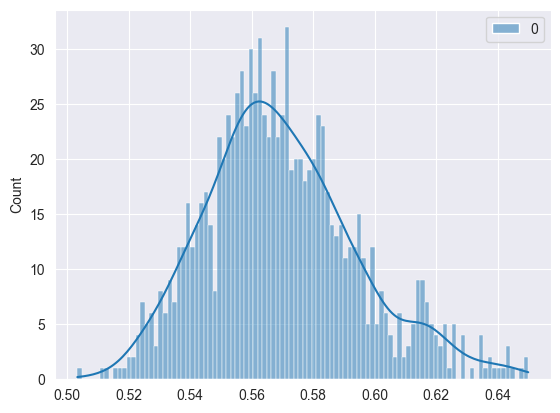

In [30]:
import pandas as pd 
import seaborn as sns
scores = np.array(insights[2]['MpY_MKP_T'][-1])
df = pd.DataFrame(scores)
sns.histplot(df, kde=True, bins=100)